In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
import cv2
import numpy as np
import glob
import os
from random import shuffle

In [2]:
from tensorflow import keras

In [3]:
import tensorflow as tf
print(tf.test.gpu_device_name())

In [4]:
X_train=[]
X_test=[]
Y_test=[]
Y_train=[]
dataTr=[]
for filename in glob.glob(os.path.join('D:/UMSA/TESIS/Tesis de grado/data/entrenamiento/Melanoma_escalado','*.jpg')):
    dataTr.append([1,cv2.imread(filename)])
for filename in glob.glob(os.path.join('D:/UMSA/TESIS/Tesis de grado/data/entrenamiento/Carcinoma_escalado','*.jpg')):
    dataTr.append([0,cv2.imread(filename)])

In [5]:
dataTe=[]
for filename in glob.glob(os.path.join('D:/UMSA/TESIS/Tesis de grado/data/prueba/melanoma_escalado','*.jpg')):
    dataTe.append([1,cv2.imread(filename)])
for filename in glob.glob(os.path.join('D:/UMSA/TESIS/Tesis de grado/data/prueba/carcinoma_escalado','*.jpg')):
    dataTe.append([0,cv2.imread(filename)])

In [6]:
def particion(datos):
    imagenes=[]
    etiquetas=[]
    for i,j in datos:
        imagenes.append(j)
        etiquetas.append(i)
    imagenes=np.array(imagenes)
    etiquetas=np.array(etiquetas)
    return (imagenes,etiquetas)

In [7]:
shuffle(dataTr)
print("en total tenemos: "+str(len(dataTr))+ " imagenes dentro de la carpeta train")
shuffle(dataTe)
print("en total tenemos: "+str(len(dataTe))+ " imagenes dentro de la carpeta test")

en total tenemos: 12279 imagenes dentro de la carpeta train
en total tenemos: 5261 imagenes dentro de la carpeta test


In [8]:
porcion1=dataTr[0:12000]
porcion2=dataTe[0:5000]
print("para entrenamiento tendremos: "+str(len(porcion1))+ " imagenes de la carpeta de train")
print("para prueba tendremos: "+str(len(porcion2))+ " imagenes de la carpeta de test")

para entrenamiento tendremos: 12000 imagenes de la carpeta de train
para prueba tendremos: 5000 imagenes de la carpeta de test


In [9]:
x_e,y_e=particion(porcion1)
x_p,y_p=particion(porcion2)

In [10]:
def validacion(x_e,y_e,x_p,y_p,modelo1,epocas):
    entre=modelo1.fit(x_e,y_e,batch_size=32,epochs=epocas,validation_data=(x_p,y_p))
    a=modelo1.evaluate(x_p,y_p)
    return a[1]

In [11]:
def evaluacion(modelo1,porcentaje,nombre,v1,v2):
    prediccion=0
    epocas=1
    while(True):
        if prediccion < porcentaje:
            prediccion=(validacion(x_e,y_e,x_p,y_p,modelo1,1))*100
            epocas +=1
            v1.append(epocas-1)
            v2.append(prediccion)
        else:
            print("==> Para el metodo "+nombre+" se utilizo: "+str(epocas-1)+" epocas para llegar a mas del "+str(porcentaje)+"% de acertividad")
            break 

In [12]:
modelo=Sequential()
modelo.add(Convolution2D(4,(3,3),input_shape=(224,224,3),activation='relu'))
modelo.add(Convolution2D(8,(3,3),activation='relu'))
modelo.add(MaxPooling2D(pool_size=((2,2))))
modelo.add(Convolution2D(16,(3,3),activation='relu'))
modelo.add(Convolution2D(32,(3,3),activation='relu'))
modelo.add(Flatten())
modelo.add(Dense(128,activation='relu'))
modelo.add(Dense(100,activation='relu'))
modelo.add(Dense(100,activation='relu'))
modelo.add(Dense(1,activation='sigmoid'))
modelo.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 4)       112       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 8)       296       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 16)      1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 32)      4640      
_________________________________________________________________
flatten (Flatten)            (None, 359552)            0         
_________________________________________

In [ ]:
modelo_adam = keras.optimizers.Adam(learning_rate=0.0008)
modelo.compile(optimizer=modelo_adam,loss='binary_crossentropy',metrics=['accuracy'])
v_eA=[]
v_aA=[]
evaluacion(modelo,82,"ADAM",v_eA,v_aA)

ERROR! Session/line number was not unique in database. History logging moved to new session 1124
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 11s 2ms/sample - loss: 2.3775 - acc: 0.8060
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 11s 2ms/sample - loss: 1.8474 - acc: 0.7970
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 11s 2ms/sample - loss: 2.0838 - acc: 0.8002
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 11s 2ms/sample - loss: 2.0804 - acc: 0.8056
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 11s 2ms/sample - loss: 2.0374 - acc: 0.7580
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 11s 2ms/sample - loss: 1.6405 - acc: 0.8126
Train on 12000 samples, validate on 5000 samples
5000/5000 [===============

5000/5000 [==============================] - 10s 2ms/sample - loss: 4.2132 - acc: 0.8094
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 10s 2ms/sample - loss: 4.2421 - acc: 0.8088
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 10s 2ms/sample - loss: 4.2695 - acc: 0.8092
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 10s 2ms/sample - loss: 4.2974 - acc: 0.8084
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 10s 2ms/sample - loss: 4.3266 - acc: 0.8076
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 10s 2ms/sample - loss: 4.3569 - acc: 0.8074
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 10s 2ms/sample - loss: 4.3868 - acc: 0.8066
Train on 12000 samples, validate on 5000 samples
5000/5000 [=======================

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Desktop\.conda\envs\tesis\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Desktop\AppData\Local\Temp\ipykernel_10172\1455346729.py", line 5, in <module>
    evaluacion(modelo,82,"ADAM",v_eA,v_aA)
  File "C:\Users\Desktop\AppData\Local\Temp\ipykernel_10172\1593769438.py", line 6, in evaluacion
    prediccion=(validacion(x_e,y_e,x_p,y_p,modelo1,1))*100
  File "C:\Users\Desktop\AppData\Local\Temp\ipykernel_10172\2085629365.py", line 2, in validacion
    entre=modelo1.fit(x_e,y_e,batch_size=32,epochs=epocas,validation_data=(x_p,y_p))
  File "C:\Users\Desktop\.conda\envs\tesis\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 727, in fit
    use_multiprocessing=use_multiprocessing)
  File "C:\Users\Desktop\.conda\envs\tesis\lib\site-packages\tensorflow_core\python\keras\engine\training_arrays.py", line 675, in fit
    s

In [14]:
entre=modelo.fit(x_e,y_e,batch_size=32,epochs=1,validation_data=(x_p,y_p))

Train on 12000 samples, validate on 5000 samples
ERROR! Session/line number was not unique in database. History logging moved to new session 1126
12000/12000 [==============================] - 156s 13ms/sample - loss: 1.2141e-10 - acc: 1.0000 - val_loss: 4.4583 - val_acc: 0.8056


In [15]:
modelo.save("D:/UMSA/Documentos/CNN cancer de piel/MODELOS/17000_4_3/modelo")

In [16]:
modelo.save_weights("D:/UMSA/Documentos/CNN cancer de piel/PESOS/17000_4_3/modelo_pesos")

In [17]:
count=1
print("# de EPOCAS     Valor del Accuracy")
print("----------------------------------")
for i in v_aA:
    print("epoca ",count," => ",i)
    count +=1

# de EPOCAS     Valor del Accuracy
----------------------------------
epoca  1  =>  80.59999942779541
epoca  2  =>  79.6999990940094
epoca  3  =>  80.01999855041504
epoca  4  =>  80.55999875068665
epoca  5  =>  75.80000162124634
epoca  6  =>  81.26000165939331
epoca  7  =>  79.96000051498413
epoca  8  =>  80.65999746322632
epoca  9  =>  80.01999855041504
epoca  10  =>  80.51999807357788
epoca  11  =>  80.19999861717224
epoca  12  =>  78.70000004768372
epoca  13  =>  80.11999726295471
epoca  14  =>  80.94000220298767
epoca  15  =>  81.00000023841858
epoca  16  =>  81.01999759674072
epoca  17  =>  80.83999752998352
epoca  18  =>  80.82000017166138
epoca  19  =>  80.83999752998352
epoca  20  =>  80.82000017166138
epoca  21  =>  80.83999752998352
epoca  22  =>  80.94000220298767
epoca  23  =>  80.86000084877014
epoca  24  =>  80.86000084877014
epoca  25  =>  80.83999752998352
epoca  26  =>  80.86000084877014
epoca  27  =>  80.83999752998352
epoca  28  =>  80.83999752998352
epoca  29  =>  8

In [18]:
%matplotlib inline
import matplotlib.pyplot as mp

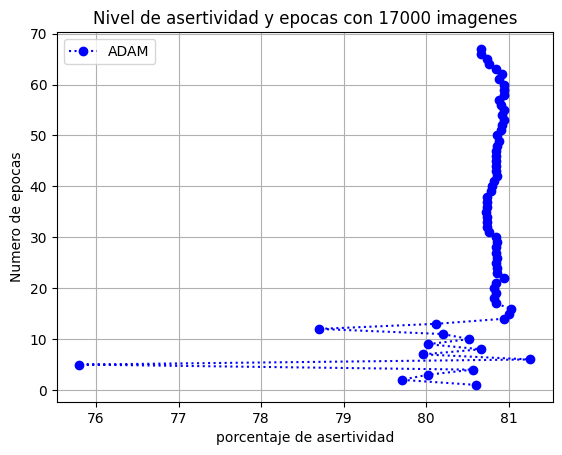

In [19]:
mp.plot(v_aA,v_eA, marker='o', linestyle=':', color='b', label = "ADAM")

#mp.xticks(np.arange(70,100,2))
#mp.yticks(np.arange(0,4,1))
mp.xlabel("porcentaje de asertividad")
mp.ylabel("Numero de epocas")
mp.legend(loc="upper left")
mp.title("Nivel de asertividad y epocas con 17000 imagenes")
mp.grid(True)
mp.show()

In [20]:
lr_probs = modelo.predict_proba(x_p)
lr_probs = lr_probs[:, 0]
ns_probs = [0 for _ in range(len(y_p))]


In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [22]:
# Calculamos el AUC
ns_auc = roc_auc_score(y_p, ns_probs)
lr_auc = roc_auc_score(y_p, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Red Neuronal: ROC AUC=%.3f' % (lr_auc))

Sin entrenar: ROC AUC=0.500
Red Neuronal: ROC AUC=0.860


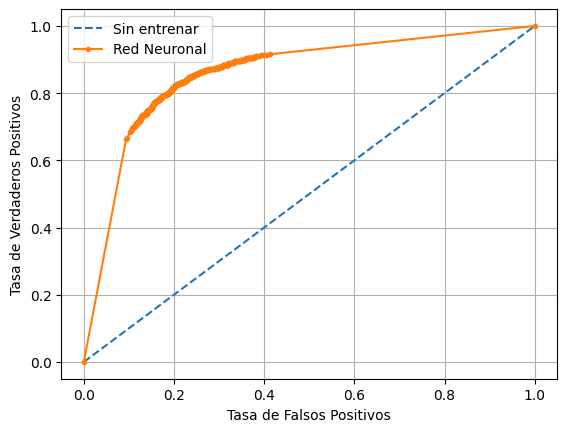

In [23]:
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_p, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_p, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Red Neuronal')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
mp.grid(True)
pyplot.show()

In [24]:
lr_probs = modelo.predict_proba(x_p)
# Nos quedamos unicamente con las predicciones positicas
lr_probs = lr_probs[:, 0]

In [25]:
yhat = modelo.predict(x_p)

In [26]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [27]:
lr_precision, lr_recall, _ = precision_recall_curve(y_p, lr_probs)
lr_auc =  auc(lr_recall, lr_precision)
no_skill = len(y_p[y_p==1]) / len(y_p)


Redes neuronales: auc=0.874


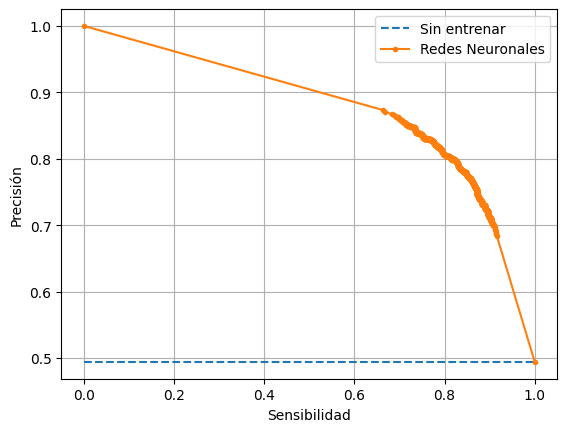

In [28]:
print('Redes neuronales: auc=%.3f' % (lr_auc))
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Redes Neuronales')
#Etiquetas de ejes
pyplot.xlabel('Sensibilidad')
pyplot.ylabel('Precisión')
pyplot.legend()
mp.grid(True)
pyplot.show()

In [29]:
modelo.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 4) dtype=float32>,
 <tf.Variable 'conv2d/bias:0' shape=(4,) dtype=float32>,
 <tf.Variable 'conv2d_1/kernel:0' shape=(3, 3, 4, 8) dtype=float32>,
 <tf.Variable 'conv2d_1/bias:0' shape=(8,) dtype=float32>,
 <tf.Variable 'conv2d_2/kernel:0' shape=(3, 3, 8, 16) dtype=float32>,
 <tf.Variable 'conv2d_2/bias:0' shape=(16,) dtype=float32>,
 <tf.Variable 'conv2d_3/kernel:0' shape=(3, 3, 16, 32) dtype=float32>,
 <tf.Variable 'conv2d_3/bias:0' shape=(32,) dtype=float32>,
 <tf.Variable 'dense/kernel:0' shape=(359552, 128) dtype=float32>,
 <tf.Variable 'dense/bias:0' shape=(128,) dtype=float32>,
 <tf.Variable 'dense_1/kernel:0' shape=(128, 100) dtype=float32>,
 <tf.Variable 'dense_1/bias:0' shape=(100,) dtype=float32>,
 <tf.Variable 'dense_2/kernel:0' shape=(100, 100) dtype=float32>,
 <tf.Variable 'dense_2/bias:0' shape=(100,) dtype=float32>,
 <tf.Variable 'dense_3/kernel:0' shape=(100, 1) dtype=float32>,
 <tf.Variable 'dense_3/bias:0' shape=(1,) dtyp